# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Loading the dataset

In [13]:
df = pd.read_csv("amazon_sales_2025_INR.csv")
df.head()


,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India


# Basic exploration of key columns

In [14]:

print(df["Delivery_Status"].value_counts())
print(df["Review_Rating"].describe())


Delivery_Status
Delivered    5075
Pending      5044
Returned     4881
Name: count, dtype: int64
count    15000.000000
mean         3.040133
std          1.411048
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Review_Rating, dtype: float64


# Visualizing delivery status and review ratings

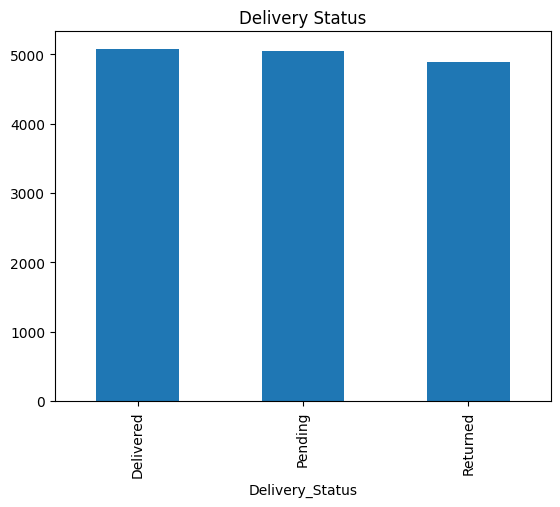

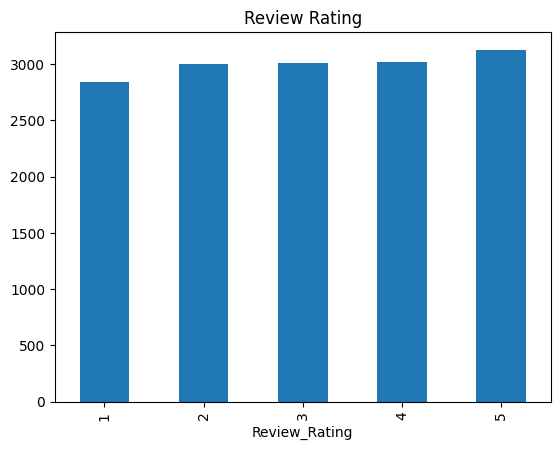

In [7]:
df["Delivery_Status"].value_counts().plot(kind="bar", title="Delivery Status")
plt.show()

df["Review_Rating"].value_counts().sort_index().plot(kind="bar", title="Review Rating")
plt.show()


# Preparing data for return prediction model

In [15]:
df_model = df[df["Delivery_Status"].isin(["Delivered", "Returned"])].copy()
df_model["Return_Flag"] = (df_model["Delivery_Status"] == "Returned").astype(int)
features = ["Quantity", "Unit_Price_INR", "Total_Sales_INR", "Product_Category", "Payment_Method"]

df_model = df_model.dropna(subset=["Quantity", "Unit_Price_INR", "Total_Sales_INR"])



# Encoding categorical variables and splitting data

In [16]:
X = pd.get_dummies(df_model[features], drop_first=True)
y = df_model["Return_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


# Training the Logistic Regression model

In [17]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)




# Evaluating the model

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5120481927710844
              precision    recall  f1-score   support

           0       0.52      0.66      0.58      1015
           1       0.50      0.36      0.42       977

    accuracy                           0.51      1992
   macro avg       0.51      0.51      0.50      1992
weighted avg       0.51      0.51      0.50      1992



# Preparing data for sentiment analysis

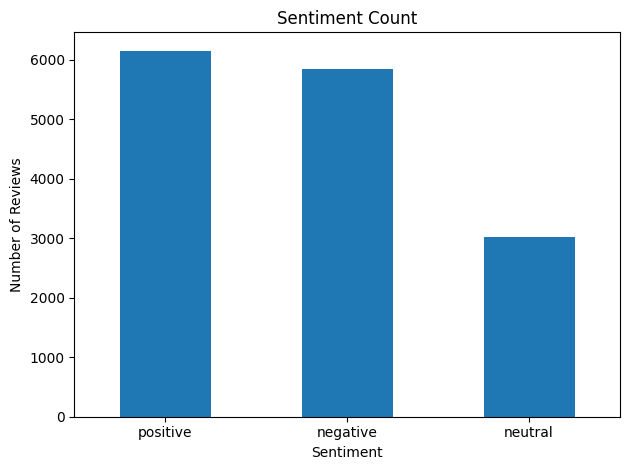

In [19]:
df_sent = df.dropna(subset=["Review_Rating"]).copy()

def rate_to_sentiment(r):
    if r >= 4:
        return "positive"
    elif r == 3:
        return "neutral"
    else:
        return "negative"

df_sent["Sentiment"] = df_sent["Review_Rating"].apply(rate_to_sentiment)
# Sentiment Count
df_sent["Sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Count")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# Linking sentiment with return behavior

Sentiment
negative    0.474468
neutral     0.497751
positive    0.501725
Name: Return_Flag, dtype: float64


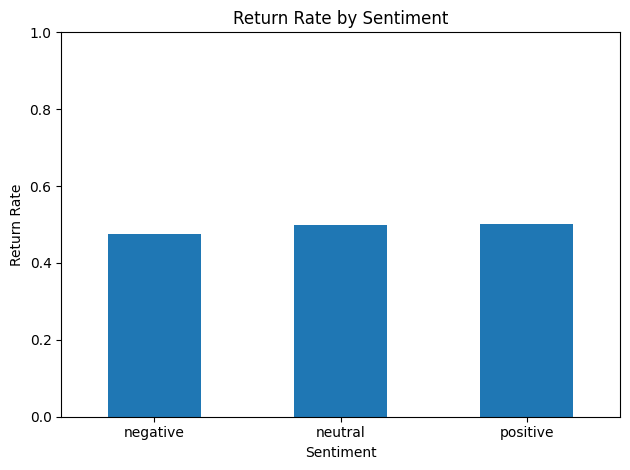

In [20]:
df_merge = df_model.copy()
df_merge["Sentiment"] = df_sent["Sentiment"]
df_merge = df_merge.dropna(subset=["Sentiment"])
sent_rate = df_merge.groupby("Sentiment")["Return_Flag"].mean()
print(sent_rate)

sent_rate.plot(kind="bar")
plt.title("Return Rate by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Return Rate")
plt.ylim(0, 1)          # optional, keeps y between 0 and 1
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
